In [56]:
import urllib.request

italy_covid_url = "https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv"

urllib.request.urlretrieve(italy_covid_url, "italy-covid-daywise.csv")

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x184b23a9f90>)

In [57]:
import pandas as pd

covid_df = pd.read_csv("italy-covid-daywise.csv")
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [58]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [59]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [60]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [61]:
covid_df.shape

(248, 4)

In [62]:
covid_df["new_tests"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
243    53541.0
244    42583.0
245    54395.0
246        NaN
247        NaN
Name: new_tests, Length: 248, dtype: float64

In [63]:
covid_df["new_tests"][243]

53541.0

In [64]:
covid_df.at[244, "new_tests"]

42583.0

In [65]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [66]:
# dataframes derived from another database don't create new memory but share the same
# memory which saves memory but also means editing the derived dataframe also edits the main one
# you can make a copy by using dataframe.copy()
cases_df = covid_df[["date", "new_cases"]]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [67]:
cases_df.loc[244]

date         2020-08-31
new_cases        1365.0
Name: 244, dtype: object

In [68]:
type(cases_df.loc[244])

pandas.core.series.Series

In [69]:
covid_df.new_tests.first_valid_index()

111

In [70]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [71]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
60,2020-02-29,238.0,4.0,NaN
218,2020-08-05,190.0,5.0,29739.0
80,2020-03-20,5322.0,429.0,NaN
30,2020-01-30,0.0,0.0,NaN
196,2020-07-14,169.0,13.0,24222.0
43,2020-02-12,0.0,0.0,NaN
17,2020-01-17,0.0,0.0,NaN
108,2020-04-17,3786.0,525.0,NaN
132,2020-05-11,802.0,165.0,25823.0


In [72]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
death_rate

0.13073679170579894

In [73]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [74]:
# passing in a boolean series to get back values where the series is true
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [75]:
bin(0b10100010 & 0b10100011)

'0b10100010'

In [76]:
bin(0b10100010 | 0b10100011)

'0b10100011'

In [77]:
bin(0b00100010 ^ 0b10100011)

'0b10000001'

In [78]:
# you can use bitwise operators to filter based on multiple conditions in one line like this
covid_df[(covid_df.new_cases > 1000) ^ (covid_df.new_deaths > 100)].head(10)

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
70,2020-03-10,1797.0,98.0,NaN
71,2020-03-11,977.0,167.0,NaN
132,2020-05-11,802.0,165.0,25823.0
133,2020-05-12,744.0,179.0,39620.0
135,2020-05-14,888.0,195.0,41131.0
136,2020-05-15,992.0,262.0,39027.0
137,2020-05-16,789.0,242.0,40657.0
138,2020-05-17,875.0,153.0,33505.0
139,2020-05-18,675.0,145.0,26101.0


In [79]:
from IPython.display import display

with pd.option_context("display.max_rows", 100):
    display(covid_df[high_new_cases])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [80]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
positive_rate = covid_df.new_cases.sum() / total_tests
positive_rate

0.05206657403227681

In [81]:
covid_df.new_cases / covid_df.new_tests > positive_rate

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool

In [82]:
covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [83]:
covid_df["positive_rate"] = covid_df.new_cases / covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [84]:
covid_df.drop(columns=["positive_rate"], inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [85]:
covid_df.sort_values("new_cases", ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [86]:
covid_df[covid_df.new_cases == covid_df.new_cases.min()]

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0


In [87]:
covid_df.at[172, "new_cases"] = (
    covid_df.at[171, "new_cases"] + covid_df.at[173, "new_cases"]
) / 2
covid_df.loc[172]

date          2020-06-20
new_cases          297.5
new_deaths          47.0
new_tests        29875.0
Name: 172, dtype: object

In [88]:
covid_df["date"]

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [89]:
covid_df["date"] = pd.to_datetime(covid_df.date)
covid_df["date"]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [90]:
dt_idx = pd.DatetimeIndex(covid_df.date)
covid_df["year"] = dt_idx.year
covid_df["month"] = dt_idx.month
covid_df["day"] = dt_idx.day
covid_df["weekday"] = dt_idx.weekday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [91]:
covid_df_metrics_may = covid_df[covid_df.month == 5][
    ["new_cases", "new_deaths", "new_tests"]
]
covid_df_metrics_may

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [92]:
covid_df_metrics_may.sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [93]:
# is average number of new cases on sunday higher than the average number of new cases in the whole dataset?
covid_df[covid_df.weekday == 6].new_cases.mean() > covid_df.new_cases.mean()

True

In [94]:
covid_df.groupby("month")

In [95]:
covid_df.groupby("month")[["new_cases", "new_deaths", "new_tests"]].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [96]:
covid_df.groupby("weekday")[["new_cases", "new_deaths", "new_tests"]].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [97]:
covid_df["total_cases"] = covid_df.new_cases.cumsum()
covid_df["total_deaths"] = covid_df.new_deaths.cumsum()
covid_df["total_tests"] = covid_df.new_tests.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


In [98]:
urllib.request.urlretrieve(
    "https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv",
    "locations.csv",
)

locations_df = pd.read_csv("locations.csv")
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [99]:
covid_df["location"] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


In [100]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [101]:
locations_df[locations_df.location == "India"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
90,India,Asia,1.380004e+09,69.66,0.53,6426.674


In [102]:
merged_df["cases_per_million"] = merged_df.new_cases * 1e6 / merged_df.population
merged_df["deaths_per_million"] = merged_df.new_deaths * 1e6 / merged_df.population
merged_df["tests_per_million"] = merged_df.new_tests * 1e6 / merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,23.882837,0.016539,885.533927
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,22.576228,0.066157,704.295609
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,16.473204,0.099236,899.658542
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,16.125877,0.132315,NaN


In [103]:
results_df = merged_df[
    [
        "date",
        "new_cases",
        "total_cases",
        "new_deaths",
        "total_deaths",
        "new_tests",
        "total_tests",
        "cases_per_million",
        "deaths_per_million",
        "tests_per_million",
    ]
]
results_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,4182478.0,23.882837,0.016539,885.533927
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,4225061.0,22.576228,0.066157,704.295609
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,4279456.0,16.473204,0.099236,899.658542
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,16.125877,0.132315,NaN


In [104]:
results_df.to_csv("results.csv", index=None)

<Axes: >

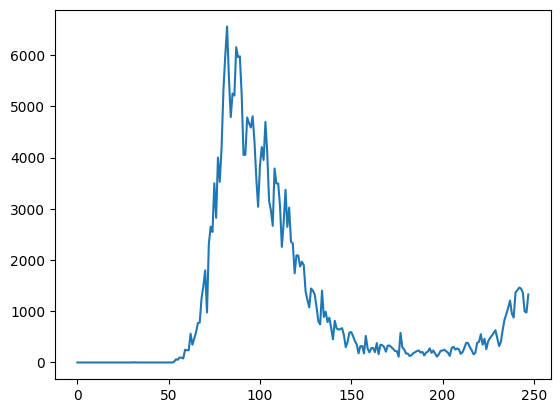

In [105]:
results_df.new_cases.plot()

<Axes: xlabel='date'>

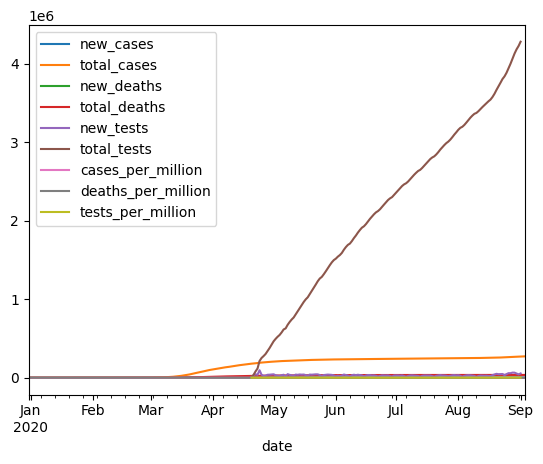

In [106]:
results_df.set_index("date", inplace=True)
results_df.plot()